In [ ]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [29]:
class AgentState(TypedDict):
    """ State for the agent. """
    name: str
    skills: List[str]
    age: str
    result: str

In [30]:
def greeting_node(state: AgentState) -> AgentState:
    """
    A node that returns a greeting message.
    """
    state['name'] = "Hey " + state["name"] + ", Goodjob at learning Langgraph."

    return state

In [31]:
def processor(state: AgentState) -> AgentState:
    """ Process the state and return a new state. """
    state['result'] = state['name'] + " Your age is " + state['age']
    return state

In [32]:
def processor2(state: AgentState) -> AgentState:
    """ Process the state and return a new state. """
    state['result'] = state['result'] + " and your skills are " + ", ".join(
        state['skills'])
    return state

In [33]:
graph = StateGraph(AgentState)
graph.add_node("processor", processor)
graph.add_node("greeting_node", greeting_node)
graph.add_node("processor2", processor2)
graph.set_entry_point("greeting_node")
graph.set_finish_point("processor2")

graph.add_edge("greeting_node", "processor")
graph.add_edge("processor", "processor2")

app = graph.compile()

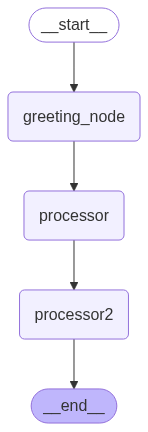

In [34]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
answer = app.invoke({
    "name": "Sbahuddin",
    "skills": ["Python", "Langgraph", "AI"],
    "age": "20"
})

In [ ]:
answer['result']

'Hey Sbahuddin, Goodjob at learning Langgraph. Your age is 20 and your skills are Python, Langgraph, AI'